In [314]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")

In [315]:
# Importando a base de dados
clientes = pd.read_csv('clientes.csv')

In [316]:
# Verificando as dimensões do arquivo
clientes.shape

(614, 13)

In [317]:
#Verificando os primeiros registros
clientes.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [318]:
# Verificando as informações dos campos da tabela de dados
# Podemos ver os campos nulos, os tipos de dados e a quantidade de linhas e colunas.
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [319]:
# Verificando se há valores nulos/ausentes
clientes.isnull().sum()

cod_cliente              0
sexo                    13
estado_civil             3
dependentes             15
educacao                 0
empregado               32
renda                    0
renda_conjuge            0
emprestimo              22
prestacao_mensal        14
historico_credito       50
imovel                   0
aprovacao_emprestimo     0
dtype: int64

In [320]:
# Verifica se há valores duplicados
clientes.duplicated().sum()

0

### Conhecendo a distribuição dos dados de cada variável/campo

In [321]:
#Estatística descritiva dads variáveis númericas
clientes.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [322]:
# Tabela de frequência da variável "aprovacao_emprestimo" - Nossa classe ou label ou target ou y ou variável a ser predita (o que a gente quer descobrir)
# Mostrando a quantidade de emprestimos aprovados na base de dados.
clientes.aprovacao_emprestimo.value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

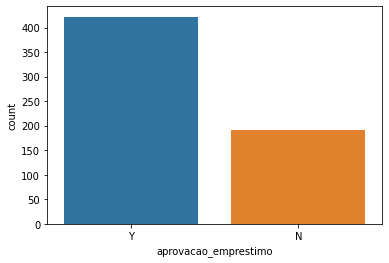

In [323]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['aprovacao_emprestimo'])


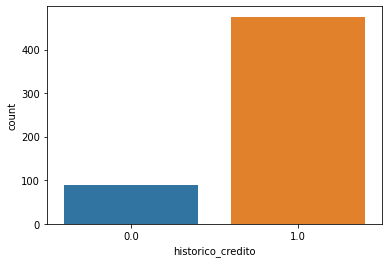

In [324]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['historico_credito'])

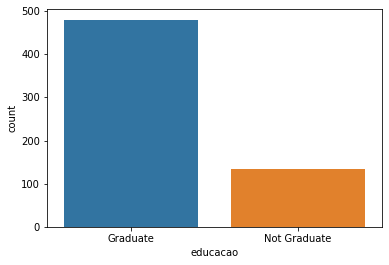

In [325]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['educacao'])

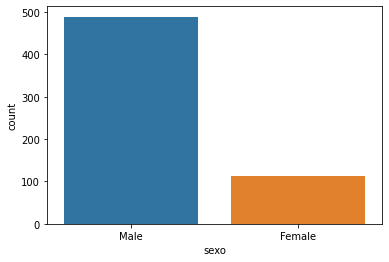

In [326]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['sexo'])

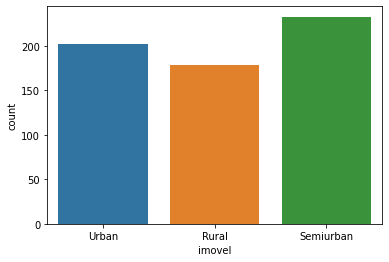

In [327]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['imovel'])

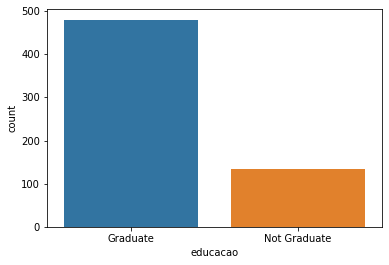

In [328]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['educacao'])

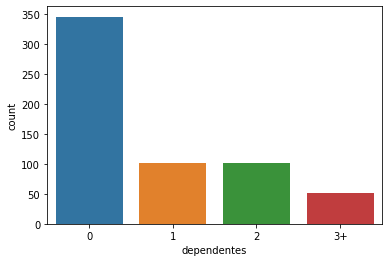

In [329]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['dependentes'])

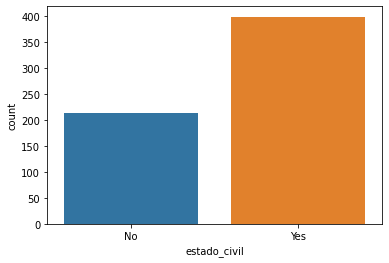

In [330]:
# Criando gráficos de barras para variáveis categóricas
sns.countplot(clientes['estado_civil'])

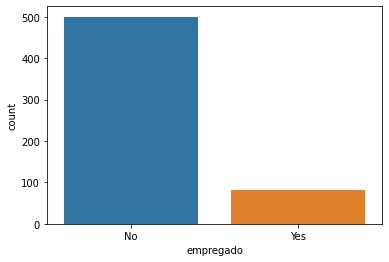

In [331]:
sns.countplot(clientes['empregado'])

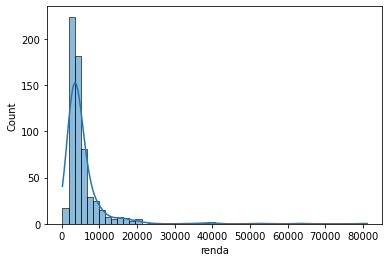

In [332]:
# Criando gráfico de distribuição para variáveis contínuas
sns.histplot(clientes['renda'], bins=50, kde=True)

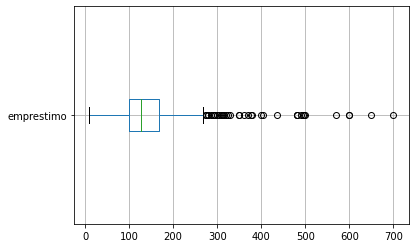

In [333]:
# Distribuição dos dados BOXPLOT
clientes.boxplot(column='emprestimo', vert=False)

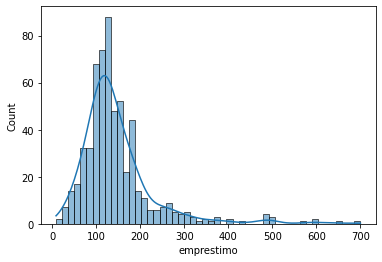

In [334]:
# criando gráfico de distribuiçã para variáveis continues
sns.histplot(clientes['emprestimo'], bins=50, kde=True)

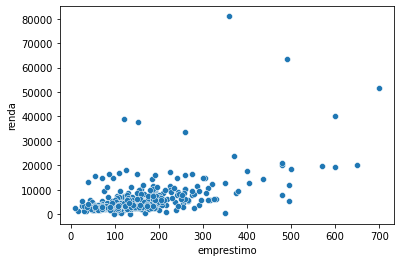

In [335]:
# Correlação entre as Variáveis
sns.scatterplot(data=clientes, x="emprestimo", y="renda")

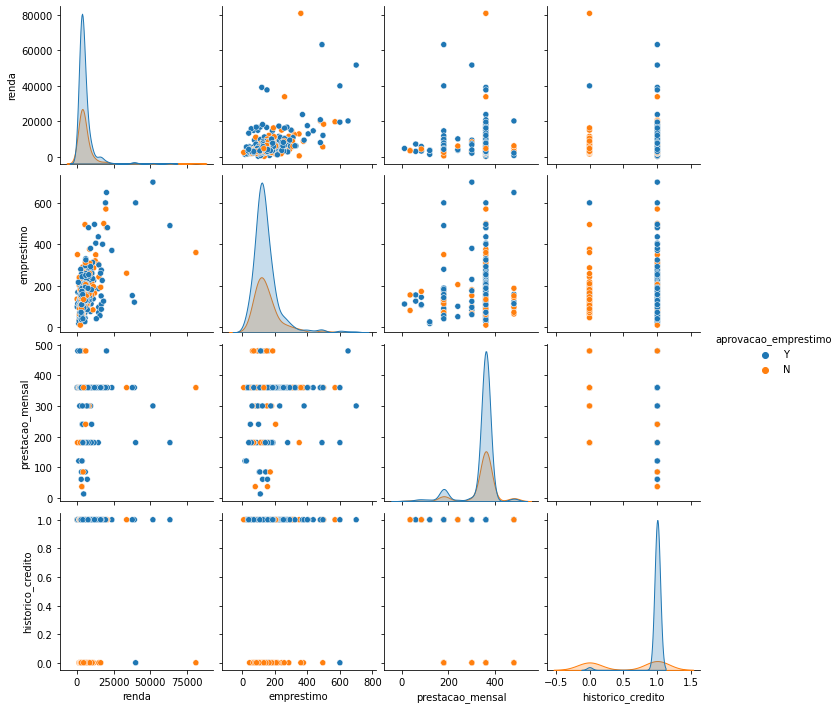

In [336]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(clientes, hue='aprovacao_emprestimo')

## Pré-Processamento dos dados

In [337]:
#Substituindo caracteres por números
clientes['sexo'] = clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil'] = clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo'] = clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [338]:
# Eliminando valores Nulos
clientes = clientes.dropna()
clientes.isnull().sum()

cod_cliente             0
sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

In [339]:
# Separando variáveis explicantivas e variáveis Target
x = clientes[['sexo','estado_civil','renda','emprestimo','historico_credito']]
y = clientes.aprovacao_emprestimo
x.shape, y.shape

((480, 5), (480,))

In [340]:
# Importando pacotes para amostragem dos dados.
from sklearn.model_selection import train_test_split

In [341]:
# Realizadno amostragem dos dados
x_train, x_teste, y_train, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 7)

# Construindo a Máquina Preditiva 

In [342]:
# Importando Pacotes para construção das Máquinas Preditivas Com Marchine Learning
# Algoritmo Ramdom Rorest
from sklearn.ensemble import RandomForestClassifier

In [343]:
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier()
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [344]:
# Avaliando a máquina preditiva

In [345]:
# Importando a Métrica de Avaliação

from sklearn.metrics import accuracy_score

In [346]:
# Avaliando a Acurácia da máquina preditiva com os dados de treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina)

1.0

In [347]:
# Avaliando a acurácia da máquina preditiva com os dados de teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina)

0.7395833333333334

### 2ª Versão da máquina preditiva

#### Calibrando os Hiperparâmetros do algoritmo

In [348]:
# Vamos utilizar um hiperparâmetr do algoritmo Random Forest de nome "max_depth",
# Cujo objetivo é exatamente combater problemas de "Overfiting"

In [349]:
# Usando o Hiperparâmetro "max_depth" para diminuir o "Overfiting" que houve na máquina criada acima

In [350]:
# Criando a máquina preditiva com Random Forest
maquina = RandomForestClassifier(max_depth=4, random_state = 7)
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [351]:
# Avaliando a acurácia da máquina com os dados de treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina_treino)

0.8229166666666666

In [352]:
# Avaliando a Acurácia da máquina preditiva com os dados de teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

0.78125

### Verificando as variáveis mais importantes

In [353]:
# Importancia das variáveis
maquina.feature_importances_

array([0.0226187 , 0.03447823, 0.17332143, 0.17593175, 0.59364989])

[0.0226187  0.03447823 0.17332143 0.17593175 0.59364989]


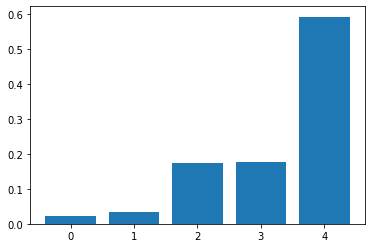

- sexo -  - estado_civil -   - renda -   - emprestimo -   - historico_credito - 


In [354]:
# Importancia das variáveis com gráficos
print(maquina.feature_importances_)

# Plotando o gráfico
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()
print('- sexo -', ' - estado_civil - ', ' - renda - ', ' - emprestimo - ', ' - historico_credito - ')

# Podemos salvar nossa máquina preditiva para criarmos o sistema na WEB

In [355]:
# Comando de Salvamento da máquina preditiva
import pickle
pickle_out = open("maquina_preditiva.pkl", mode = "wb")
pickle.dump(maquina, pickle_out)
pickle_out.close()

In [356]:
#instalação do Pacote para Conexão do nosso Sistema na WEB 
!pip install -q pyngrok

In [357]:
#instalação dos Pacotes para Implementação do nosso Sistema na WEB
!pip install streamlit
!pip install -q streamlit
!pip install -q streamlit_ace

# Criando o sistema

In [364]:
%%writefile app.py

#Importando Pacotes 
import pickle
import streamlit as st
 
# Carregando a Máquina Preditiva
pickle_in = open('maquina_preditiva.pkl', 'rb') 
maquina_preditiva = pickle.load(pickle_in)

#Manter a sessão em cache 
@st.cache()
  
# Criando a função que irá fazer a predição usando os dados impostados pelo usuário do Sistema 
def prediction(sexo, estado_civil, renda, emprestimo, historico_credito):   
 
    # Pre-processando a entrada do Usuário    
    if sexo == "Masculino":
        sexo = 0
    else:
        sexo = 1
 
    if estado_civil == "Solteiro(a)":
        estado_civil = 0
    else:
        estado_civil = 1
 
    if historico_credito == "Débitos Pendentes":
        historico_credito = 0
    else:
        historico_credito = 1  
 
    emprestimo = emprestimo / 1000
 
    # Fazendo Predições
    prediction = maquina_preditiva.predict( 
        [[sexo, estado_civil, renda, emprestimo, historico_credito]])
     
    if prediction == 0:
        pred = 'Rejeitado'
    else:
        pred = 'Aprovado'
    return pred
      
  
# Essa função é para criação da webpage  
def main():  

    # Elementos da webpage
    # Nesse Ponto vc deve Personalizar o Sistema com sua Marca
    html_temp = """ 
    <div style ="background-color:blue;padding:13px"> 
    <h1 style ="color:white;text-align:center;">SAE</h1> 
    <h2 style ="color:white;text-align:center;">Sistema de Aprovação de Empréstimos - by Gil Rocha</h2> 
    </div> 
    """
      
    # Função do stramlit que faz o display da webpage
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # As linhas abaixo criam as caixas na qual o usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
    sexo = st.selectbox('Sexo',("Masculino","Feminino"))
    estado_civil = st.selectbox('Estado Civil',("Solteiro(a)","Casado(a)")) 
    renda = st.number_input("Renda Mensal") 
    emprestimo = st.number_input("Valor Total do Empréstimo")
    historico_credito = st.selectbox('Histórico de Créditos',("Sem Débitos","Débitos Pendentes"))
    result =""
      
    #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho
    if st.button("Verificar"): 
        result = prediction(sexo, estado_civil, renda, emprestimo, historico_credito) 
        st.success('O empréstimo foi {}'.format(result))
        print(emprestimo)
     
if __name__=='__main__': 
    main()



Overwriting app.py


In [359]:
#Executa o sistema
!streamlit run app.py &>/dev/null&

In [360]:
from pyngrok import ngrok

In [361]:
public_url = ngrok.connect('8501')

In [362]:
#URL do sistema
public_url

<NgrokTunnel: "http://d4e1ec608a17.ngrok.io" -> "http://localhost:8501">